# <span style=color:blue><b>SPRINT 5 - Tarea M5 T02</b></span>  

**Ejercicios de Train-Test con ScikitLearn a partir de un dataset con información sobre las viviendas de Houston.**  
**Concerns housing values in suburbs of Boston.**

## Ejercicio 1
<span style=color:green><b><i>Parte el conjunto de datos adjunto en train y test. Estudia ambos conjuntos por separado, a nivel descriptivo. También adjunto encontrarás una descripción de las diferentes variables del dataset.</i></b></span>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Open the choosen file
BasePath = "C:/Users/Pepo/Desktop/Data Science/Barcelona Activa"
Archivo = BasePath + "/Sprint 5. Introducción al Test de Hipótesis y al Machine Learning"

df = pd.read_csv(Archivo + '/Tarea 2_ViviendasHouston/housing data.csv', 
                header = None, 
                 names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", 
                          "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**Attribute Information:**  
  
    1. CRIM         per capita crime rate by town  
    2. ZN           proportion of residential land zoned for lots over 25,000 sq.ft.  
    3. INDUS        proportion of non-retail business acres per town  
    4. CHAS         Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
    5. NOX          nitric oxides concentration (parts per 10 million)  
    6. RM           average number of rooms per dwelling  
    7. AGE          proportion of owner-occupied units built prior to 1940  
    8. DIS          weighted distances to five Boston employment centres  
    9. RAD          index of accessibility to radial highways  
    10. TAX         full-value property-tax rate per $10,000  
11. PTRATIO     pupil-teacher ratio by town  
12. B           1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
13. LSTAT       % lower status of the population  
14. MEDV        Median value of owner-occupied homes in $1000's

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<Figure size 1440x720 with 0 Axes>

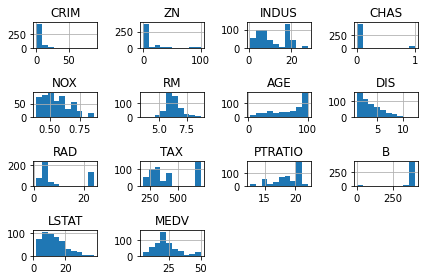

In [5]:
plt.figure(figsize = (20,10))
df.hist()
plt.tight_layout() # para que no se superpongan las graficas

In [6]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


### Procedimiento planteado:  
 - La evaluación, se realiza dividiendo los datos de la siguiente manera: 80% Train y 20% Test.
 - Las variables independientes denominados "X", corresponden a todas las columnas del dataframe "df", eliminando la última columna que corresponde a la variable dependiente "y" denominada MEDV (Median value of owner-occupied homes in $1000's) - 

In [7]:
# train-test split evaluation 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# load dataset
data = df.values

# split into inputs and outputs
X, y = data[:, :-1], data[:, -1]
print("Shape X:", X.shape,"\nShape y:", y.shape)

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print("Shape X_train:", X_train.shape, "\nShape X_test:", X_test.shape, "\nShape y_train:", y_train.shape, "\nShape y_test:",y_test.shape)


Shape X: (506, 13) 
Shape y: (506,)
Shape X_train: (404, 13) 
Shape X_test: (102, 13) 
Shape y_train: (404,) 
Shape y_test: (102,)


**R:**  
 - El conjunto total de datos tiene 506 filas (observaciones) y 14 columnas (variables).
 - Solamente la última colunma se concidera variable dependiente (target o output), las otras 13 columnas son variables independientes que se utilizan para predecir el valor promedio de las viviendas.
 - Al dividir el conjunto de datos en train y test, se escogió hacerlo en 80% train y 20% test.
 - El 80% equivale a 404 filas.
 - El 20% equivale a 102 filas.

## Ejercicio 2
<span style=color:green><b><i>Aplica algún proceso de transformación (estandarizar los datos numéricos, crear columnas dummies, polinomios...).</i></b></span>

https://scikit-learn.org/stable/modules/preprocessing.html  
https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/

**ESTANDARIZACIÓN:**

In [8]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

#En el ejercicio 1, ya se definió el dataset numérico "data" y se definió los inputs "X":

Xscaled = scale.fit_transform(X)

print(Xscaled.round(3))

[[-0.42   0.285 -1.288 ... -1.459  0.441 -1.076]
 [-0.417 -0.488 -0.593 ... -0.303  0.441 -0.492]
 [-0.417 -0.488 -0.593 ... -0.303  0.396 -1.209]
 ...
 [-0.413 -0.488  0.116 ...  1.176  0.441 -0.983]
 [-0.408 -0.488  0.116 ...  1.176  0.403 -0.865]
 [-0.415 -0.488  0.116 ...  1.176  0.441 -0.669]]


In [13]:
df_standard = pd.DataFrame(Xscaled)
df_standard.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.42,-0.49,-1.56,-0.27,-1.47,-3.88,-2.34,-1.27,-0.98,-1.31,-2.71,-3.91,-1.53
25%,-0.41,-0.49,-0.87,-0.27,-0.91,-0.57,-0.84,-0.81,-0.64,-0.77,-0.49,0.21,-0.80
50%,-0.39,-0.49,-0.21,-0.27,-0.14,-0.11,0.32,-0.28,-0.52,-0.46,0.27,0.38,-0.18
75%,0.01,0.05,1.02,-0.27,0.60,0.48,0.91,0.66,1.66,1.53,0.81,0.43,0.60
max,9.93,3.80,2.42,3.67,2.73,3.56,1.12,3.96,1.66,1.80,1.64,0.44,3.55


<Figure size 1440x720 with 0 Axes>

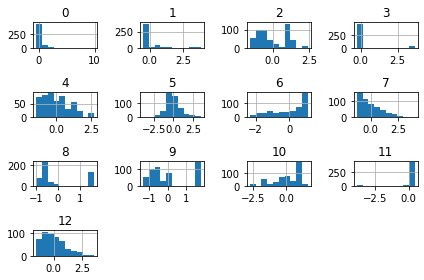

In [15]:
plt.figure(figsize = (20,10))
df_standard.hist()
plt.tight_layout() # para que no se superpongan las graficas

**NORMALIZACIÓN:**

In [10]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

normalized = MinMaxScaler()

#En el ejercicio 1, ya se definió el dataset numérico "data" y se definió los inputs "X":

Xnormalized = normalized.fit_transform(X)

print(Xnormalized.round(3))

[[0.    0.18  0.068 ... 0.287 1.    0.09 ]
 [0.    0.    0.242 ... 0.553 1.    0.204]
 [0.    0.    0.242 ... 0.553 0.99  0.063]
 ...
 [0.001 0.    0.42  ... 0.894 1.    0.108]
 [0.001 0.    0.42  ... 0.894 0.991 0.131]
 [0.    0.    0.42  ... 0.894 1.    0.17 ]]


In [14]:
df_normalized = pd.DataFrame(Xnormalized)
df_normalized.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,0.04,0.11,0.39,0.07,0.35,0.52,0.68,0.24,0.37,0.42,0.62,0.90,0.30
std,0.10,0.23,0.25,0.25,0.24,0.13,0.29,0.19,0.38,0.32,0.23,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.13,0.45,0.43,0.09,0.13,0.18,0.51,0.95,0.14
50%,0.00,0.00,0.34,0.00,0.31,0.51,0.77,0.19,0.17,0.27,0.69,0.99,0.27
75%,0.04,0.12,0.65,0.00,0.49,0.59,0.94,0.37,1.00,0.91,0.81,1.00,0.42
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


<Figure size 1440x720 with 0 Axes>

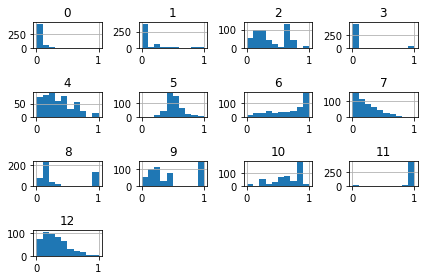

In [17]:
plt.figure(figsize = (20,10))
df_normalized.hist()
plt.tight_layout() # para que no se superpongan las graficas

**DUMMIES:**

Como se observó en la información del dataframe, todos los valores son numéricos, NO EXISTEN valores categóricos que requieran convertise en dummies.  
  
*OBERVASIÓN: La columna "CHAS", ya está establecida como una variable dummy, donde (= 1 if tract bounds river; 0 otherwise).*

**POLYNOMIAL FEATURE:**

 - Podemos aplicar DIRECTAMENTE la transformación polinómica al conjunto de datos.
 - En este caso, usaremos un grado de 3. (Se recomienda 2 o 3)

In [18]:
# visualize a polynomial features transform
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures

# retrieve just the numeric INPUT values (X)
data = df.values[:, :-1]

# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=3)
X_Polynomial = trans.fit_transform(data)

# summarize
print(X_Polynomial.shape)

(506, 560)


 - Podemos observar como las columnas aumentaron de 13 a 560 (INPUTS)

## Ejercicio 3
<span style=color:green><b><i>Resume las nuevas columnas generadas de forma estadística y gráfica</i></b></span>

**Efecto del grado del polinomio**  
 - El grado del polinomio incrementa el número de inputs (columnas) 
 - Se genere una nueva matriz que consiste en todas las combinaciones de polinomios de las características (columna) con un grado menor o igual que el grado especificado. Por ejemplo, si una muestra de entrada es bidimensional y tiene la forma [a, b], las características polinómicas de grado 2 son [1, a, b, a^2, ab, b^2].
 - El "grado" del polinomio se usa para controlar la cantidad de características agregadas, por lo general, se usa un grado pequeño, como 2 o 3.


Degree: 1, Features: 14
Degree: 2, Features: 105
Degree: 3, Features: 560
Degree: 4, Features: 2380
Degree: 5, Features: 8568


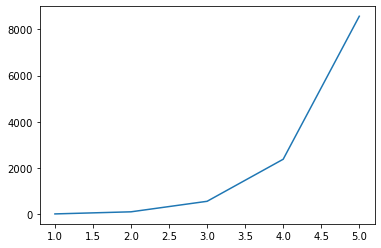

In [23]:
# compare the effect of the degree on the number of created features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot

# define dataset
data = df.values
X, y = data[:, :-1], data[:, -1]

# calculate change in number of features
num_features = list()
degress = [i for i in range(1, 6)]
for d in degress:
    # create transform
    trans = PolynomialFeatures(degree=d)
    # fit and transform
    data = trans.fit_transform(X)
    # record number of features
    num_features.append(data.shape[1])
    # summarize
    print('Degree: %d, Features: %d' % (d, data.shape[1]))
# plot degree vs number of features
pyplot.plot(degress, num_features)
pyplot.show()

A partir de un grado = 3, se observa un considerable incremento de input (columnas).